#### _takin' care of imports_

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

#### _read in data_

In [6]:
weather = pd.read_table('data/daily_weather.tsv')

In [7]:
stations = pd.read_table('data/stations.tsv')

In [8]:
usage = pd.read_table('data/usage_2012.tsv')

#### _repeat data fixing from previous exercise_

In [9]:
weather['date'] = pd.to_datetime(weather['date'])

In [10]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [11]:
weather.loc[weather['season_desc'] == 'winter', 'season_code'] = 4
weather.loc[weather['season_desc'] == 'spring', 'season_code'] = 1
weather.loc[weather['season_desc'] == 'summer', 'season_code'] = 2
weather.loc[weather['season_desc'] == 'fall', 'season_code'] = 3

## 1a. Plot the daily temperature over the course of the year. (This should probably be a line chart.)

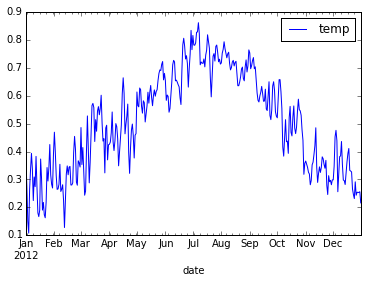

In [12]:
weather.plot(x='date', y='temp')
plt.show()

## 1b. Create a bar chart that shows the average temperature and humidity by month.

In [13]:
temp_humid = weather[['temp', 'humidity']].groupby(weather['date'].dt.month).mean()

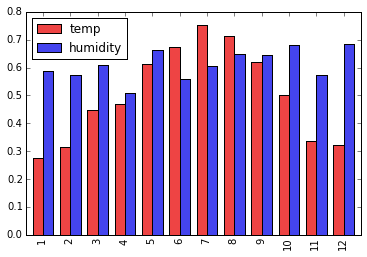

In [14]:
temp_humid.plot(kind='bar', width=0.75, color=['#EE4444','#4444EE'])
plt.show()

## 2. Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

In [15]:
spring_daily_vol = weather.loc[weather['season_desc'] == 'spring']
summer_daily_vol = weather.loc[weather['season_desc'] == 'summer']
fall_daily_vol = weather.loc[weather['season_desc'] == 'fall']
winter_daily_vol = weather.loc[weather['season_desc'] == 'winter']

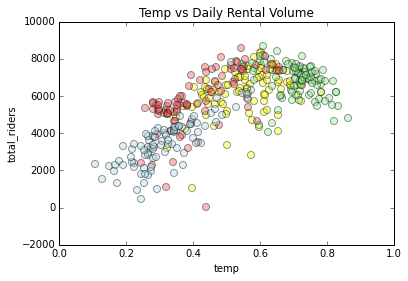

In [91]:
spr_ax = spring_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='yellow', s=50, alpha=.4)
sum_ax = summer_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='lightgreen', s=50, alpha=.4, ax=spr_ax)
fal_ax = fall_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='#ee5555', s=50, alpha=.4, ax=sum_ax)
win_ax = winter_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='lightblue', s=50, alpha=.4, ax=fal_ax)
plt.title('Temp vs Daily Rental Volume')
plt.show()

## 3. Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

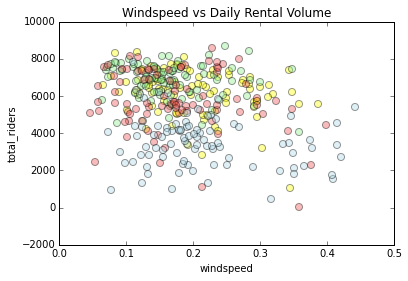

In [90]:
spr_ax = spring_daily_vol.plot(kind='scatter', x='windspeed', y='total_riders', c='yellow', s=50, alpha=.4)
sum_ax = summer_daily_vol.plot(kind='scatter', x='windspeed', y='total_riders', c='lightgreen', s=50, alpha=.4, ax=spr_ax)
fal_ax = fall_daily_vol.plot(kind='scatter', x='windspeed', y='total_riders', c='#ee5555', s=50, alpha=.4, ax=sum_ax)
win_ax = winter_daily_vol.plot(kind='scatter', x='windspeed', y='total_riders', c='lightblue', s=50, alpha=.4, ax=fal_ax)
plt.title('Windspeed vs Daily Rental Volume')
plt.show()

## 4. How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [82]:
usage_stations = usage[['station_start']]

In [78]:
stations_geo = stations[['station', 'lat', 'long']]

In [83]:
usage_stations.head()

,station_start
0,7th & R St NW / Shaw Library
1,Georgia & New Hampshire Ave NW
2,Georgia & New Hampshire Ave NW
3,14th & V St NW
4,11th & Kenyon St NW


In [80]:
stations_geo.head()

,station,lat,long
0,20th & Bell St,38.856100,-77.051200
1,18th & Eads St.,38.857250,-77.053320
2,20th & Crystal Dr,38.856400,-77.049200
3,15th & Crystal Dr,38.860170,-77.049593
4,Aurora Hills Community Ctr/18th & Hayes St,38.857866,-77.059490


In [93]:
usage_stations.columns = ['stations']

In [95]:
usage_stations.head()

,stations
0,7th & R St NW / Shaw Library
1,Georgia & New Hampshire Ave NW
2,Georgia & New Hampshire Ave NW
3,14th & V St NW
4,11th & Kenyon St NW


In [109]:
station_count = DataFrame(usage_stations['stations'].value_counts())

In [111]:
station_count.columns = ['number_of_rides']

In [113]:
station_count.head()

,number_of_rides
Massachusetts Ave & Dupont Circle NW,69850
Columbus Circle / Union Station,55146
15th & P St NW,49416
17th & Corcoran St NW,43547
14th & V St NW,40242
